<a href="https://colab.research.google.com/github/Qitaa/PCVK_Genap_2023/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

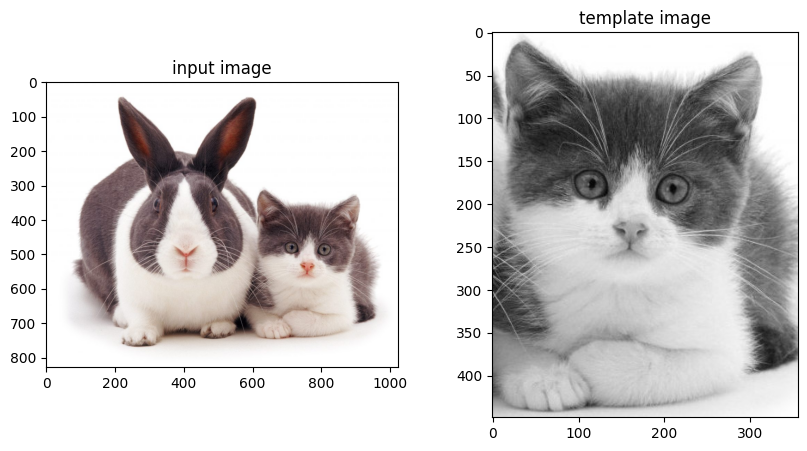

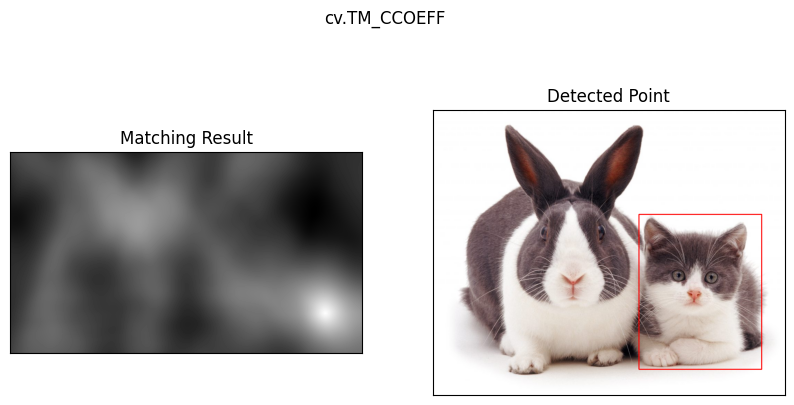

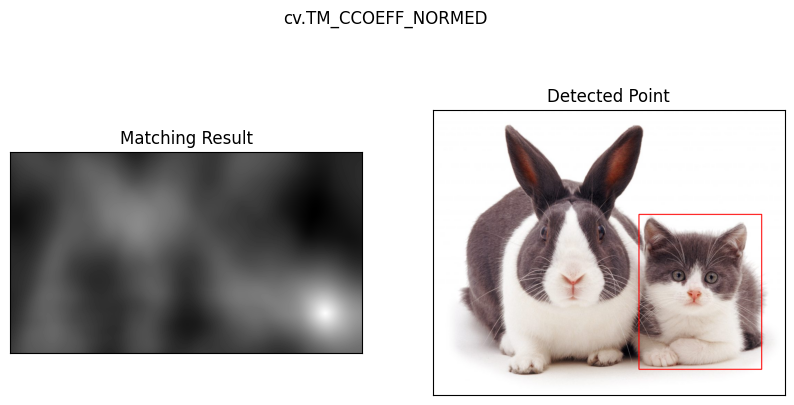

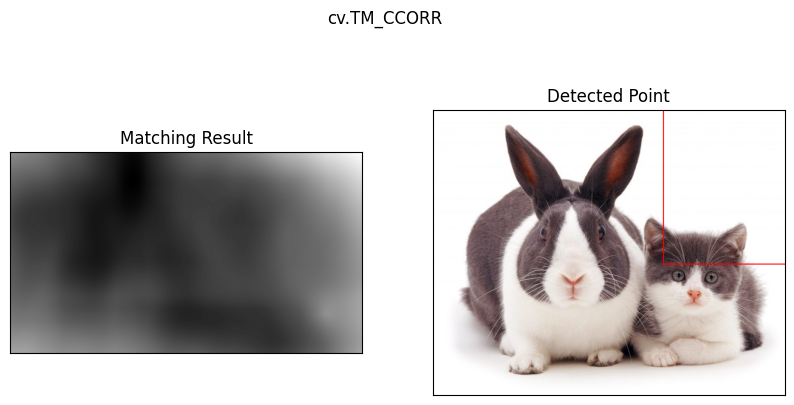

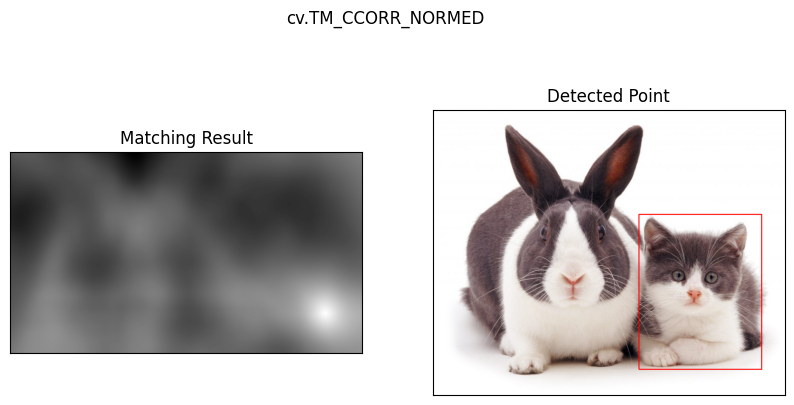

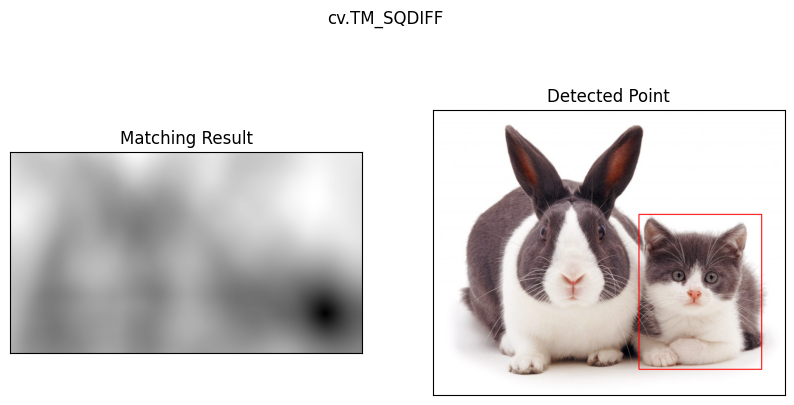

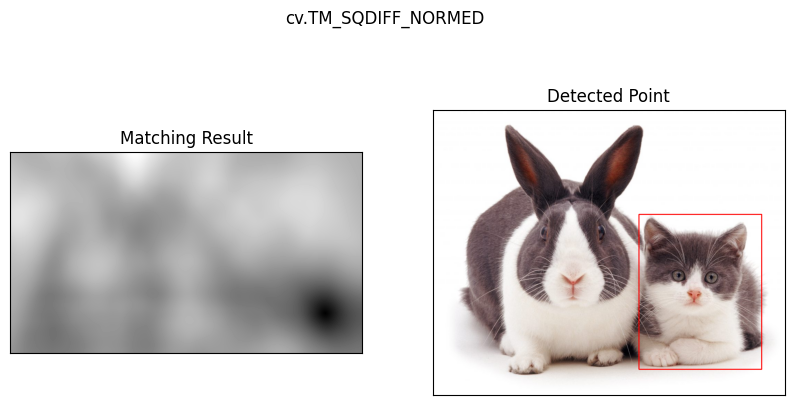

In [33]:
bunny_cat = cv.imread('/content/drive/MyDrive/Images/cats_and_bunnies.jpg')
bunny_cat_gray = cv.cvtColor(bunny_cat, cv.COLOR_BGR2GRAY)
image = bunny_cat.copy()

cat = cv.imread('/content/drive/MyDrive/Images/cat2_templatejpg.jpg',0)
w, h = cat.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(10,5))  
axarr[0].imshow(cv.cvtColor(bunny_cat, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(cat, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = image.copy()
    method = eval(meth)
    res = cv.matchTemplate(bunny_cat_gray,cat,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, (0,0,255), 2)
    plt.figure(figsize=(10,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

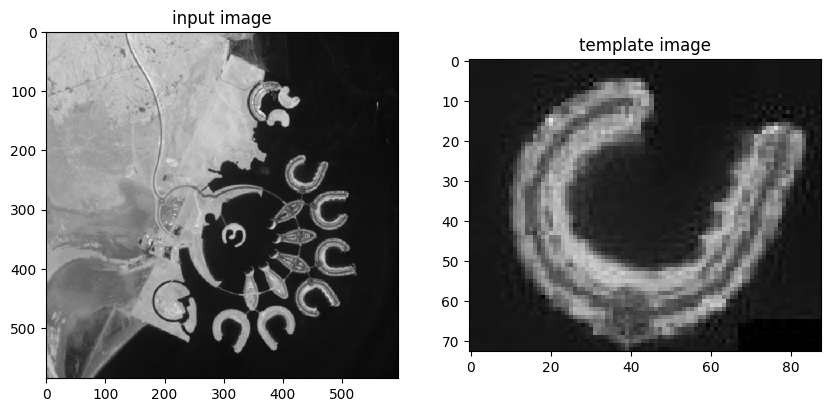

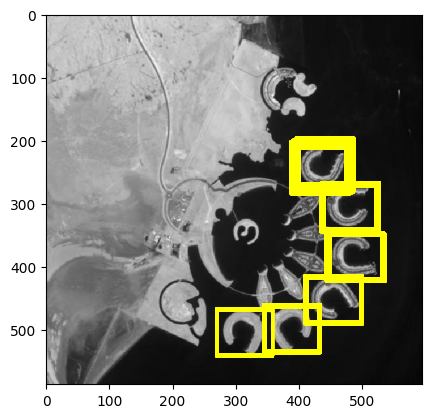

In [34]:
from skimage.feature import match_template

# Load gambar dan template
img = cv.imread('/content/drive/MyDrive/Images/bahrain.jpg')
template = cv.imread('/content/drive/MyDrive/Images/bahrain-template.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

f, axarr = plt. subplots(1,2,figsize=(10,5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")


h, w = template.shape

res = match_template(img, template)

threshold = 0.45
loc = np.where(res >= threshold)
     
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

for pt in zip(*loc[::-1]):
    rec = plt.Rectangle(pt, w, h, edgecolor='yellow', facecolor='none', linewidth=2)
    ax.add_patch(rec)
plt.show()
     

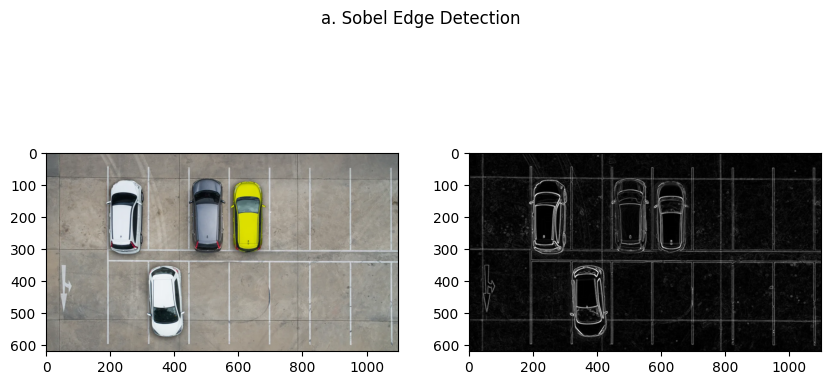

In [35]:
# Sobel Edge Detection

parking = cv.imread('/content/drive/MyDrive/Images/car-park.jpg')

gray = cv.cvtColor(parking, cv.COLOR_BGR2GRAY)

img = cv.GaussianBlur(gray,(3,3),0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(10,5))
plt.subplot(121),plt.imshow(cv.cvtColor(parking, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(parking, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
plt.suptitle('a. Sobel Edge Detection')
plt.show()

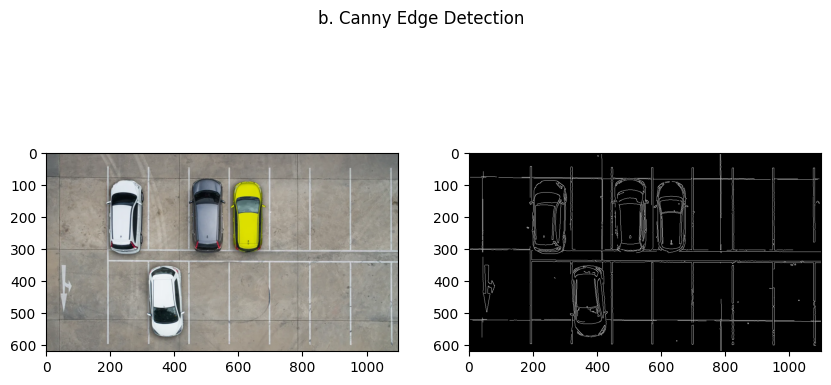

In [36]:
# Canny Edge Detection
img_canny = parking.copy()
edges = cv.Canny(img,100,200)

f, axarr = plt. subplots(1,2,figsize=(10,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img_canny, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.suptitle('b. Canny Edge Detection')
plt.show()

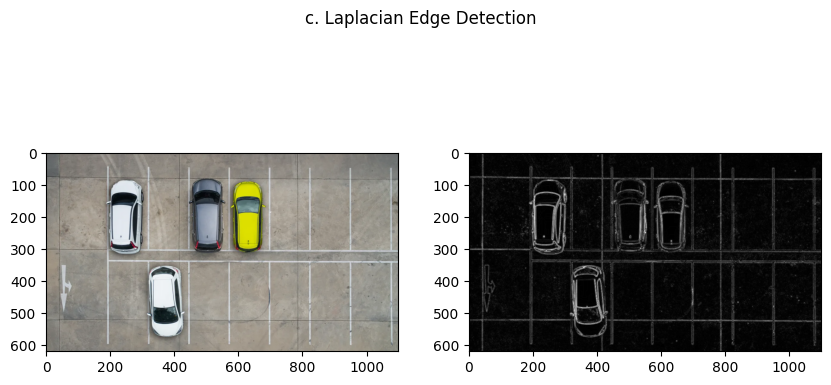

In [37]:
# Laplacian Edge Detection

img_laplacian = parking.copy()
img_parking = cv.GaussianBlur(img_laplacian,(3,3),0)
parking_gray = cv.cvtColor(img_parking, cv.COLOR_BGR2GRAY)
filtered_image = cv.Laplacian(parking_gray, ksize=3, ddepth=cv.CV_16S)

filtered_image = cv.convertScaleAbs(filtered_image)

f, axarr = plt. subplots(1,2,figsize=(10,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img_laplacian, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img_laplacian, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(filtered_image,cmap = 'gray')
plt.suptitle('c. Laplacian Edge Detection')
plt.show()

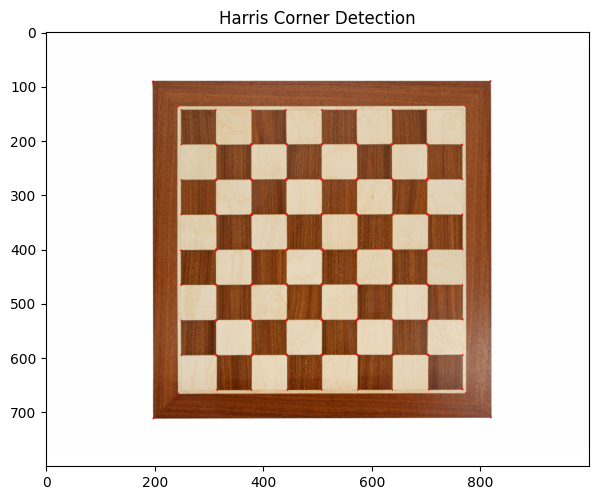

In [38]:
# Harris Corner Detection
input_img = cv.imread('/content/drive/MyDrive/Images/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
harris_output = cv.dilate(harris_output, None)
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(7,7)) 
plt.title('Harris Corner Detection')
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

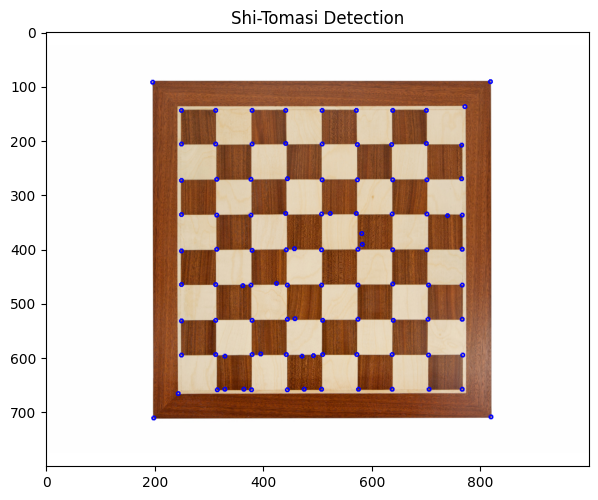

In [39]:
# Shi-Tomasi Detection
input_img = cv.imread('/content/drive/MyDrive/Images/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(7,7))
plt.title('Shi-Tomasi Detection')
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

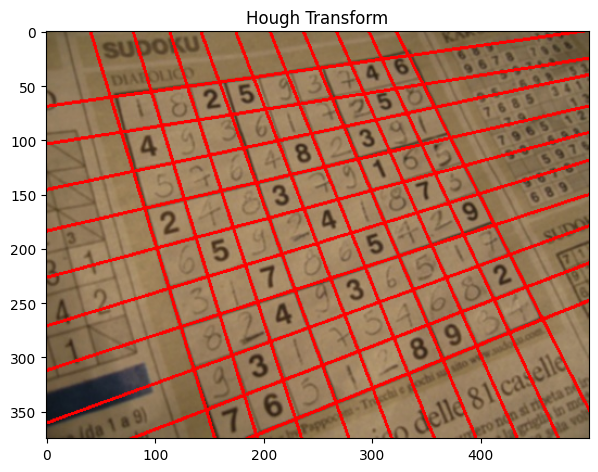

In [40]:
sudoku = cv.imread('/content/drive/MyDrive/Images/sudoku.jpg') 
img_gray = cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)
kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)
kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)
lines = cv.HoughLines(edges,1,np.pi/180,150)

if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): # filtering
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(sudoku, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(7,7)) 
    plt.title('Hough Transform')
    plt.imshow(cv.cvtColor(sudoku, cv.COLOR_BGR2RGB))

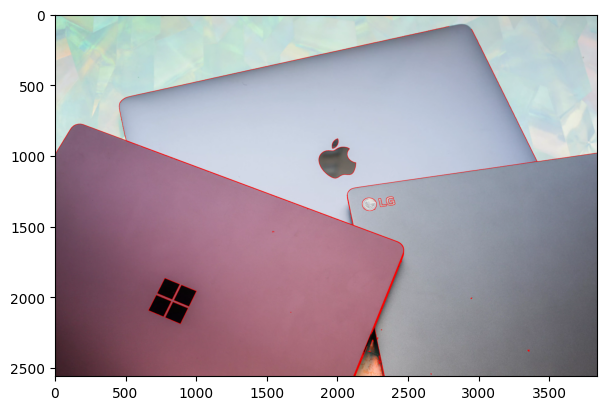

In [41]:
laptop = cv.imread('/content/drive/MyDrive/Images/laptop.jpg') 
laptop_gray = cv.cvtColor(laptop, cv.COLOR_BGR2GRAY)

edged = cv.Canny(laptop_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(laptop, contours, -1, (0,0,255), 2)

plt.figure(figsize=(7,7)) 
plt.imshow(cv.cvtColor(laptop, cv.COLOR_BGR2RGB))